## 梯度下降

### 一个变量的线性回归

导入库
numpy(矩阵计算的库)
pandas(数据分析的库，一般和numpy结合使用)
matplotlib(绘图的库)

In [602]:
import pandas
import numpy
import matplotlib.pyplot as plt

读取数据
注意，有些数据第一行可能是标题，pandas默认第一行为头，由于本文件没有头
所以需要在后面加上header=None，如果想要定义一个头，则在需要添加names=[]的一个数组

先将xy的数据在坐标上画出来，观察其特征（实际上已经知道了是一个线性关系）
scatter为散点图的意思，figsize为图像大小

先初始化函数，Y=theta1*X+theta0
矩阵形式就是theta=[theta0,theeta1]
theta就初始化为theta=[0,0]

In [603]:
def initData(dataName):
    data=pandas.read_csv(dataName,header=None).values
    data=numpy.array(data)

    #data.head()
    #data.describe()
    #data.plot(kind='scatter', x='x', y='y', figsize=(8,6))
    #plt.show()

    theta=numpy.ones(data.shape[1])
    #theta=[80000,130,-80000]#测试第二个样本数据，把结果直接放在最优得附件，看看下降的过去不，结果发现还是很难到达
    print(theta)
    return data,theta

有了theta我们就可以计算当前代价了

定义代价函数
代价的计算方程为
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$


这里的h(x)可以用矩阵成发表示，theta*x==>[0,0]*[1,x]T来表示

In [604]:
def computeCost(data,theta):
    cols=data.shape[1]
    
    x=data[:,0:cols-1]
    y=data[:,cols-1]


    
    
    
    ycom=numpy.matmul(x,theta)#矩阵内积得到计算出来的ycom

    ycom=ycom-y
    
    cost=numpy.matmul(ycom,ycom)/(2*data.shape[0])#内积，也就是平方求和后除2m

    return cost,ycom#保留ycom，后续梯度下降要用到

代价函数计算完后，就可以考虑如何最小化代价了，按照梯度下降的方法，对每个代价函数的每一个theta求导，也就是梯度下降
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
这里运用求导的方法可以算出导数，然后就可以开始梯度下降

这里的gradientDescent()方法，先计算一次代价，然后利用得到得cost画图看下降过程，ycom来用于梯度下降

In [605]:
from traitlets import Undefined


def gradientDescent(theta,data,alpha,time):
    
    #插入常数1，便于矩阵计算
    #data.insert(0,'ones',1)

    ones=numpy.ones(data.shape[0])

    data=numpy.c_[ones,data]




    #列数
    cols=data.shape[1]
    #行数,样本数量
    row=data.shape[0]

    costs=[]
    for i in range(time):#下降100次
        #计算当前代价
        cost,ycom=computeCost(data,theta)
        costs.append(cost)
        
        x=data[:,0:cols-1]
        x=numpy.transpose(x)#转置一下

        sum=numpy.matmul(x,ycom)/row#sum除以m(就是样本量row),这个就是梯度下降的微分部分
        
        theta=theta-alpha*numpy.transpose(sum)
    return theta,costs


主运行代码如下
调用gradientDescent()方法开始梯度下降，返回theta也就是方程参数，costs每次下降后的代价

[1. 1.]
[-3.89578088  1.19303364]


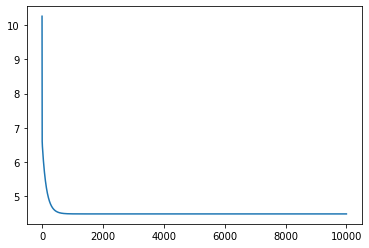

In [606]:
def main01():
    data,theta=initData('ex1data1.txt')#读取数据
    theta,costs=gradientDescent(theta,data,0.02,10000)
    print(theta)

    # #画costs图观察下降趋势
    # plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(costs)
    plt.show()

    # #画样本散点和拟合后的方程，观察拟合情况
    # plt.figure(figsize=(8, 6), dpi=100)
    # plt.scatter(data.x,data.y)
    # x=numpy.arange(0,25,0.1)
    # y=theta[1]*x+theta[0]
    # plt.plot(x,y)
    # plt.show()
main01()


可以的，有了一元一次方程线性回归的经验，二元一次不是问题
## 多变量线性回归
在开始多元前，整理一下前面的代码，把复用的整理成方法

运行第二个二元一次回归出现了指数溢出，猜测原因是样本没有特征缩放
果然，当我把下降比列调的很小时（0.0000001），就运行成功了
但是和正规方程求得theta还差很多

In [607]:
'''
特征缩放，第一种和第二种都是
第一个是样本减去平均值后除以方差
第二个是样本减去平均值后除以平均值
虽然不知道效果怎么样，但下降率确实变快了，0.01就可以了
'''
def featureScaling(data):
    return (data-numpy.mean(data, axis=0))/numpy.std(data,axis=0)
    #return (data-numpy.mean(data, axis=0))/numpy.mean(data, axis=0)

[1. 1. 1.]
[-1.08265505e-16  8.84765988e-01 -5.31788197e-02]


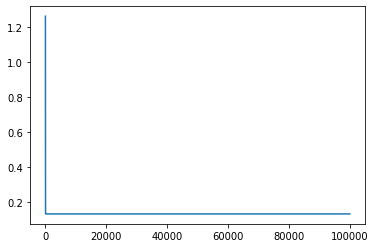

In [608]:
def main02():
    data,theta=initData('ex1data2.txt')#读取数据
    data=featureScaling(data)

    theta,costs=gradientDescent(theta,data,0.111,100000)
    print(theta)

    plt.plot(costs)
    plt.show()
main02()

上面的是关于一元以及多元使用梯度下降来线性回归的
在试试正规方程来线性回归
## 正规方程的线性回归
笔记上说了，正规方程的时间复杂度为O(n3)，所以当特征量很多的时候推荐梯度下降
公式如下
$$\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$$

In [609]:
from pyparsing import col


def normalEquation(dataName):
    #读取数据
    data=pandas.read_csv(dataName,header=None).values
    data=numpy.array(data)


    #测试样本2归一化后与梯度下降得结果比较，theta0差距较大，梯度得到的波动较大
    data=featureScaling(data)

    #插入theta0(插入一列1)
    data=numpy.insert(data,0,numpy.ones((data.shape[0])),axis=1)

    #提取x,y
    column=data.shape[1]
    x=data[:,0:column-1]
    y=data[:,column-1]

    xT=numpy.transpose(x)
    theta=numpy.matmul(numpy.matmul(numpy.linalg.inv(numpy.matmul(xT,x)),xT),y)
    return theta

normalEquation('ex1data2.txt')

array([-2.77555756e-17,  8.84765988e-01, -5.31788197e-02])